In [1]:
pip install sentinelsat

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

  Using cached tensorflow-2.6.0-cp39-cp39-win_amd64.whl (423.3 MB)
  Using cached tensorboard-2.6.0-py3-none-any.whl (5.6 MB)
  Using cached grpcio-1.41.0-cp39-cp39-win_amd64.whl (3.2 MB)
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)

  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached numpy-1.19.5-cp39-cp39-win_amd64.whl (13.3 MB)
  Using cached h5py-3.1.0-cp39-cp39-win_amd64.whl (2.7 MB)
  Using cached wrapt-1.12.1-py3-none-any.whl
  Using cached keras-2.6.0-py2.py3-none-any.whl (1.3 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorflow_estimator-2.6.0-py2.py3-none-any.

In [3]:
import os
import shutil
import random
import itertools
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib as mpl
from keras import backend
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from keras.applications import imagenet_utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import precision_score, recall_score
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet import decode_predictions, preprocess_input

In [4]:
labels = ['Flooding', 'No Flooding']
train_path =  '/content/drive/MyDrive/Data/data/train'
valid_path = '/content/drive/MyDrive/Data/data/valid'
test_path = '/content/drive/MyDrive/Data/data/test'

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/content/drive/MyDrive/Data/data/train'

In [4]:
mobile = tf.keras.applications.mobilenet.MobileNet()

17235968/17225924 [==============================] - 0s 0us/step


In [5]:
# last 5 layers of the mobilenet during finetuning as we want 
x = mobile.layers[-6].output

In [6]:
output = Dense(units=2, activation='softmax')(x)

In [7]:

model = Model(inputs=mobile.input, outputs=output)

In [8]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [10]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [12]:
model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=10,
          verbose=2
)

Epoch 1/10
54/54 - 144s - loss: 0.2322 - accuracy: 0.9084 - val_loss: 0.8206 - val_accuracy: 0.7130
Epoch 2/10
54/54 - 9s - loss: 0.0973 - accuracy: 0.9757 - val_loss: 0.3226 - val_accuracy: 0.9074
Epoch 3/10
54/54 - 9s - loss: 0.0616 - accuracy: 0.9738 - val_loss: 0.2586 - val_accuracy: 0.9074
Epoch 4/10
54/54 - 9s - loss: 0.0619 - accuracy: 0.9832 - val_loss: 0.0982 - val_accuracy: 0.9630
Epoch 5/10
54/54 - 9s - loss: 0.0183 - accuracy: 0.9981 - val_loss: 0.0865 - val_accuracy: 0.9722
Epoch 6/10
54/54 - 9s - loss: 0.0156 - accuracy: 1.0000 - val_loss: 0.0865 - val_accuracy: 0.9722
Epoch 7/10
54/54 - 8s - loss: 0.0298 - accuracy: 0.9944 - val_loss: 0.0844 - val_accuracy: 0.9537
Epoch 8/10
54/54 - 9s - loss: 0.0200 - accuracy: 0.9981 - val_loss: 0.0796 - val_accuracy: 0.9630
Epoch 9/10
54/54 - 9s - loss: 0.0124 - accuracy: 1.0000 - val_loss: 0.0800 - val_accuracy: 0.9630
Epoch 10/10
54/54 - 9s - loss: 0.0110 - accuracy: 0.9981 - val_loss: 0.1189 - val_accuracy: 0.9630


In [13]:
# Saving and loading our trained for future use

model.save("model.h5")
# model.load_weights('fine_tuned_flood_detection_model')

In [14]:
# Make predictions and plot confusion matrix to look how well our model performed in classifying 
# flooding and no flooding images 

test_labels = test_batches.classes
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))
precision = precision_score(y_true=test_labels, y_pred=predictions.argmax(axis=1))
f1_score = f1_score(y_true=test_labels, y_pred=predictions.argmax(axis=1))
accuracy = accuracy_score(y_true=test_labels, y_pred=predictions.argmax(axis=1))
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [15]:
# Pring precision, F1 score and accuracy of our model
print('Precision: ', precision)
print('F1 Score: ', f1_score)
print('Accuracy: ', accuracy)

Precision:  0.9736842105263158
F1 Score:  0.9487179487179489
Accuracy:  0.9619047619047619


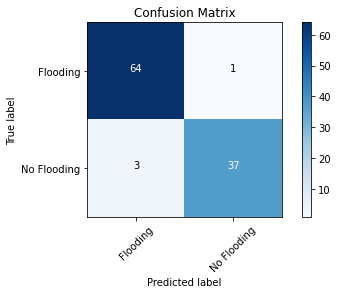

In [16]:
# Confusion Matrix 
test_batches.class_indices
cm_plot_labels = ['Flooding','No Flooding']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [21]:
# Prepare image for mobilenet prediction

def preprocess_image(file):
    img_path = '/content/drive/MyDrive/Data/data/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

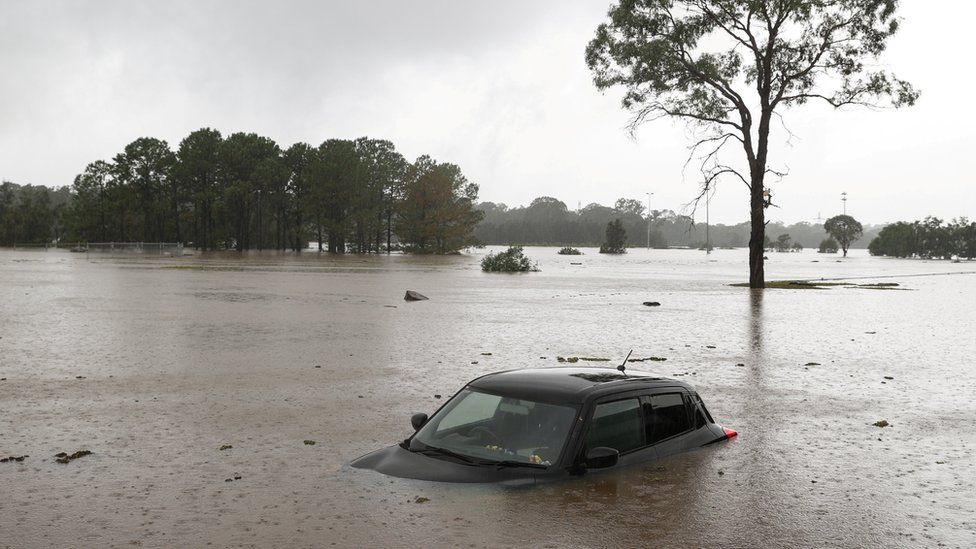

In [18]:
# Display image which we want to predict
from IPython.display import Image
Image(filename='/content/drive/MyDrive/Data/data/30.jpg', width=300,height=200) 

In [22]:
preprocessed_image = preprocess_image('30.jpg')
predictions = model.predict(preprocessed_image)

In [23]:
predictions

array([[9.9984610e-01, 1.5387197e-04]], dtype=float32)

In [24]:
result = np.argmax(predictions)

In [25]:
labels[result]

'Flooding'